In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading the data set file
df=pd.read_csv("student_data.csv")
# list the first five rows of the dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## check the unique values

In [3]:
df.Fjob.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [4]:
df.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [5]:
df.Pstatus.unique()

array(['A', 'T'], dtype=object)

In [6]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [7]:
df.address.unique()

array(['U', 'R'], dtype=object)

In [8]:
df.famsize.unique()

array(['GT3', 'LE3'], dtype=object)

In [9]:
numeric_data = df.select_dtypes('number')

In [10]:
# list the last five rows of the dataset
df.tail() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
#describe the data
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
df.shape

(395, 33)

In [14]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.skew()  

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6536/2352091020.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age           0.466270
Medu         -0.318381
Fedu         -0.031672
traveltime    1.607029
studytime     0.632142
failures      2.387026
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          2.190762
Walc          0.611960
health       -0.494604
absences      3.671579
G1            0.240613
G2           -0.431645
G3           -0.732672
dtype: float64

In [17]:
df.kurt()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6536/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


age           -0.001222
Medu          -1.090014
Fedu          -1.198539
traveltime     2.344190
studytime     -0.014432
failures       5.004727
famrel         1.139772
freetime      -0.301807
goout         -0.770250
Dalc           4.759492
Walc          -0.790845
health        -1.014078
absences      21.719150
G1            -0.693830
G2             0.627706
G3             0.403421
dtype: float64

## Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

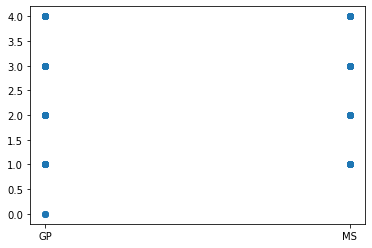

In [18]:
#scatter plot
plt.scatter(df.school,df.Medu)
plt.show

<AxesSubplot:>

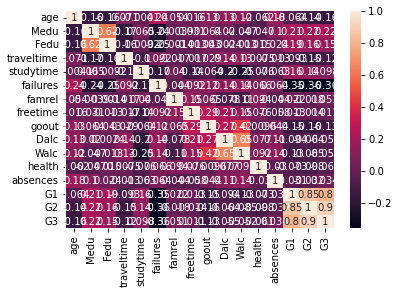

In [19]:
# Heatmap 
corr = df.corr()
sns.heatmap(corr,annot=True)

<AxesSubplot:>

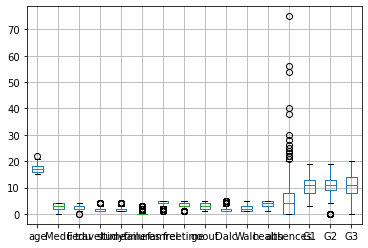

In [20]:
df.boxplot()

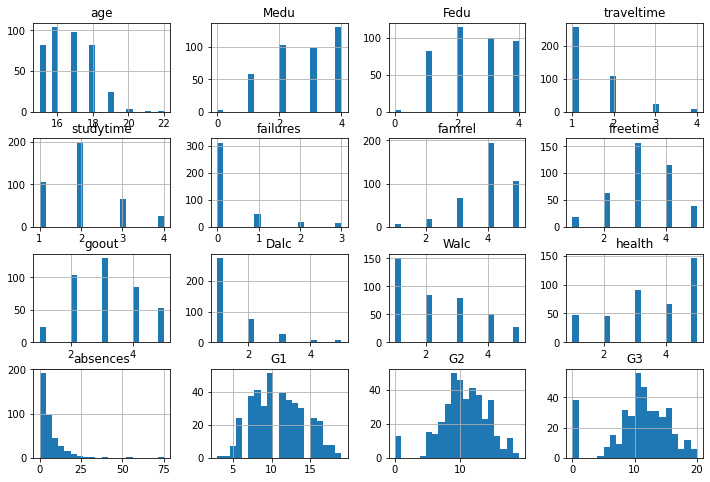

In [21]:
#Histogram
df.hist(figsize=(12,8),bins=20)
plt.show()

In [22]:
# change the columns values as (0,1) with map method
df['school'] = df['school'].map({'GP':0, 'MS':1})
df['famsize'] = df['famsize'].map({'LE3':0, 'GT3':1})
df['Pstatus'] = df['Pstatus'].map({'A':0, 'T':1})
df['address'] = df['address'].map({'U':0, 'R':1})
df['Mjob'] = df['Mjob'].map({'at_home':0, 'health':1, 'other':2, 'services':3, 'teacher':4})
df['Fjob'] = df['Fjob'].map({'teacher':0, 'other':1, 'services':2, 'health':3, 'at_home':4})
df['reason'] = df['reason'].map({'course':0, 'other':1, 'home':2, 'reputation':3})
df['guardian'] = df['guardian'].map({'mother':0, 'father':1, 'other':2})
df['nursery'] = df['nursery'].map({'yes':0, 'no':1})      
df['higher'] = df['higher'].map({'yes':0, 'no':1})
df['internet'] = df['internet'].map({'yes':0, 'no':1})
df['schoolsup'] = df['schoolsup'].map({'no':0, 'yes':1})
df['romantic'] = df['romantic'].map({'no':0, 'yes':1})
df['famsup'] = df['famsup'].map({'no':0, 'yes':1})
df['paid'] = df['paid'].map({'no':0, 'yes':1})
df['activities'] = df['activities'].map({'no':0, 'yes':1})
df['sex'] = df['sex'].map({'F':0, 'M':1})

In [23]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.222785,0.711392,0.896203,2.749367,2.521519,2.169620,1.450633,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.889572,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10


<AxesSubplot:>

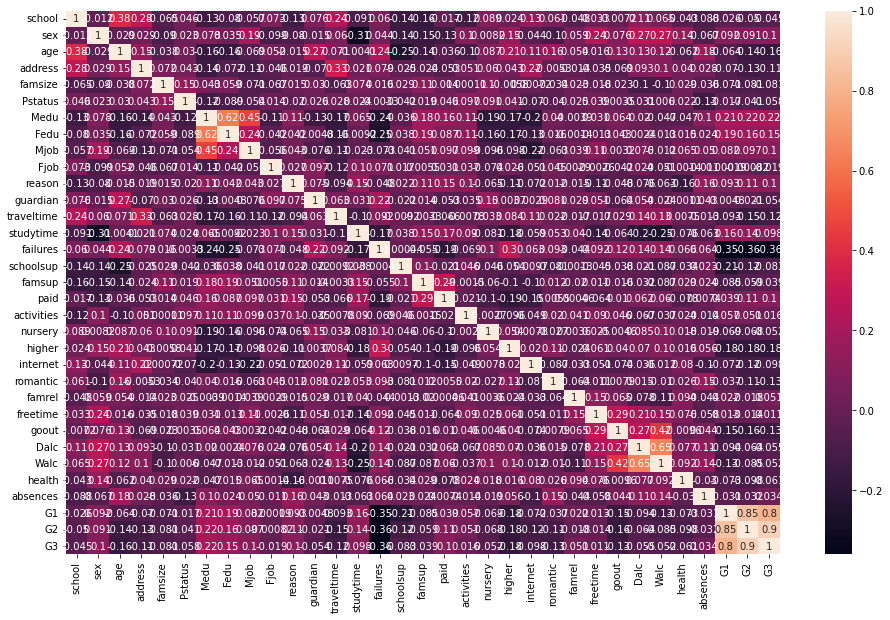

In [25]:
plt.figure(figsize=(16,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

school
2.3913932506662836


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


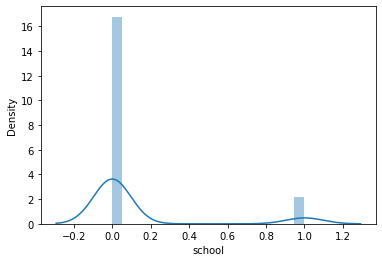

sex
0.10647970125382199


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


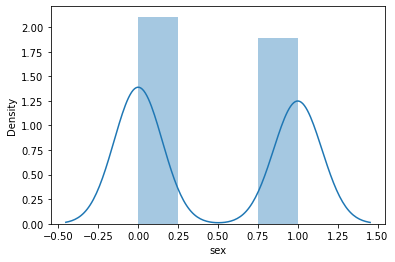

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


age
0.4644976441488073


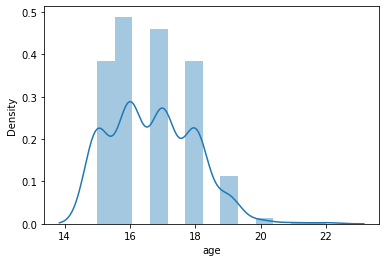

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


address
1.3323968308189678


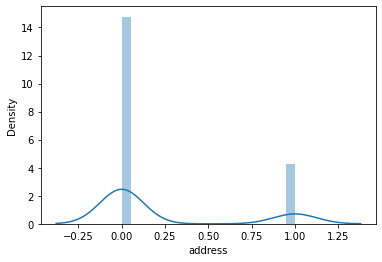

famsize
-0.9330628225793213


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


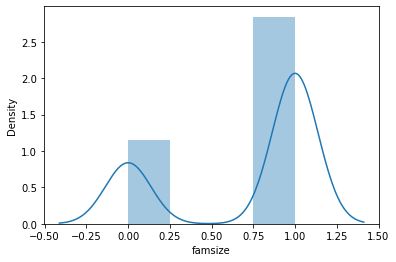

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Pstatus
-2.5980695815360617


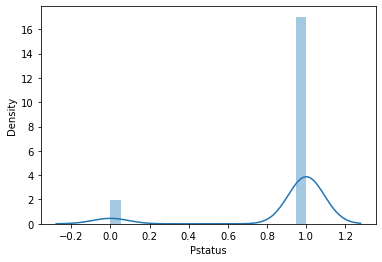

Medu
-0.3171703702447653


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


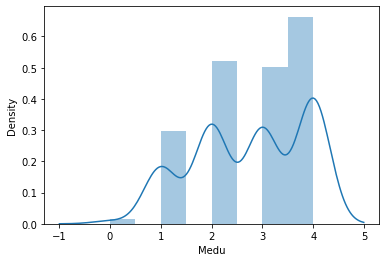

Fedu
-0.031551693562405225


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


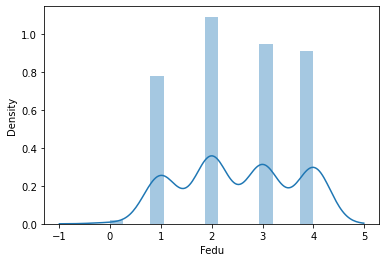

Mjob
-0.3339141417235484


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


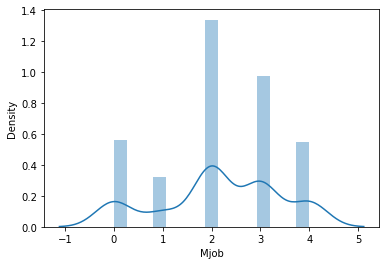

Fjob
1.1131478274414266


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


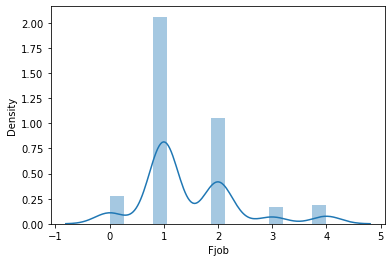

reason
-0.02610404440131767


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


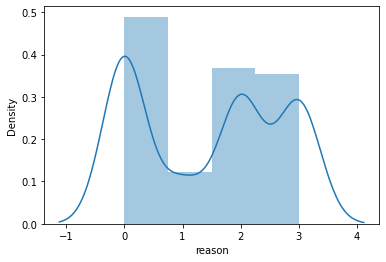

guardian
1.379915929248407


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


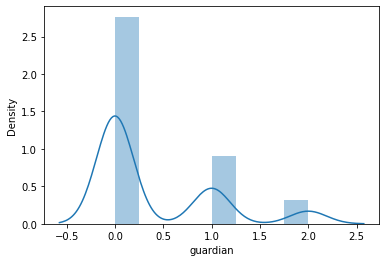

traveltime
1.6009200127720675


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


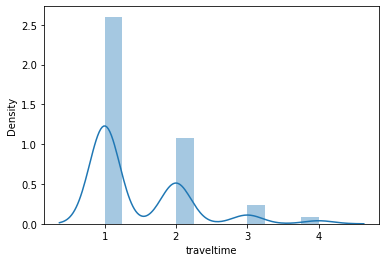

studytime
0.6297391235433967


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


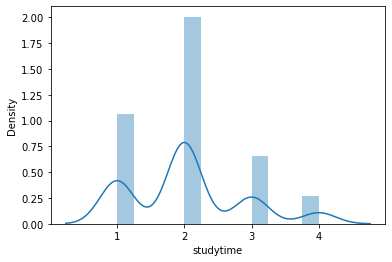

failures
2.377951490371123


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


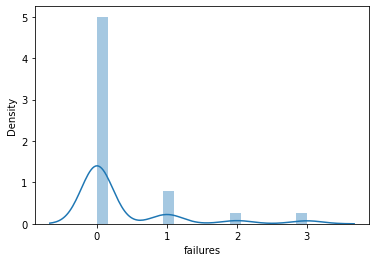

schoolsup
2.2120926411814623


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


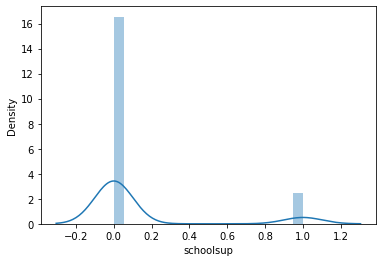

famsup
-0.4625264872025242


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


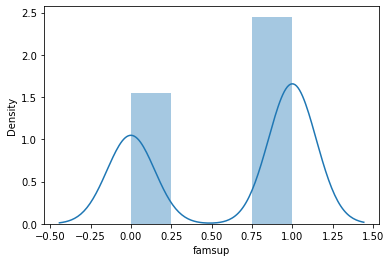

paid
0.16767478794474364


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


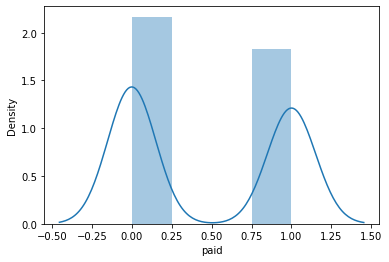

activities
-0.03544860476856564


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


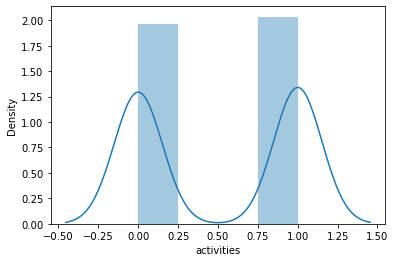

nursery
1.460994522000693


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


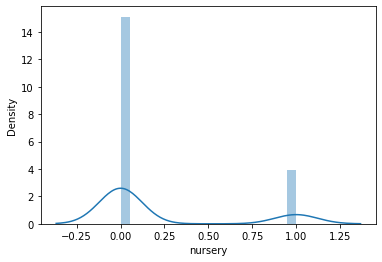

higher
4.099186911246341


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


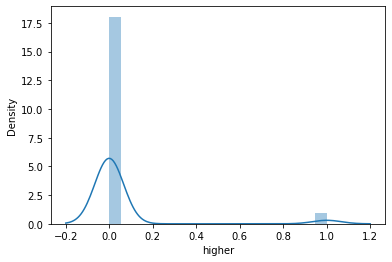

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


internet
1.7847846894188797


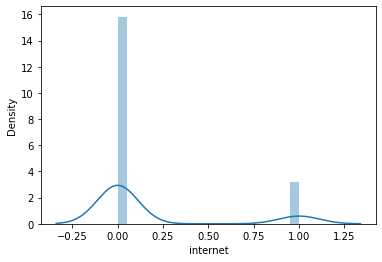

romantic
0.7030827711647135


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


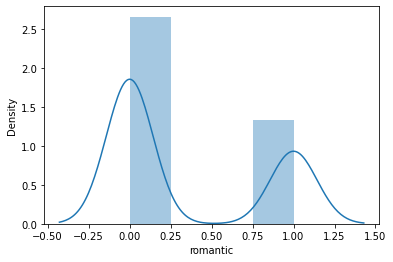

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


famrel
-0.9482631296772357


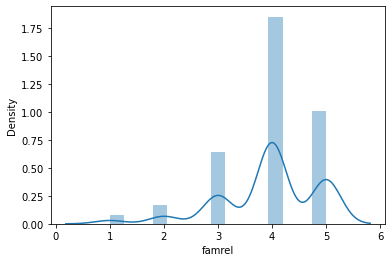

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


freetime
-0.16272977819790777


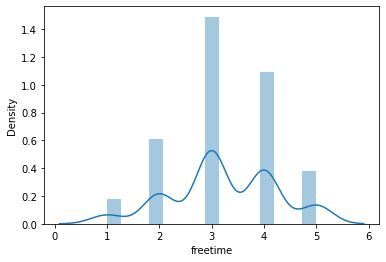

goout
0.1160595351020097


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


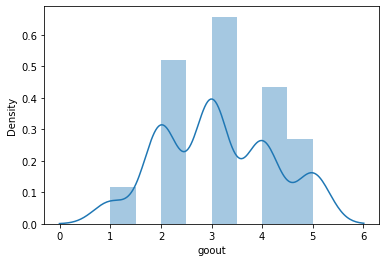

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dalc
2.182433705414191


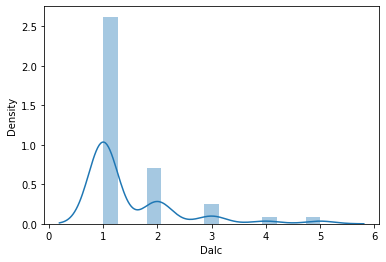

Walc
0.609633628529253


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


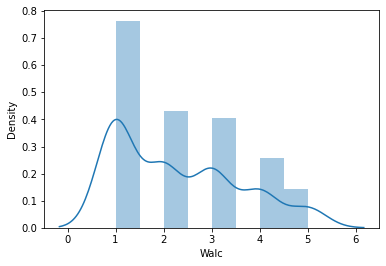

health
-0.4927233419842353


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


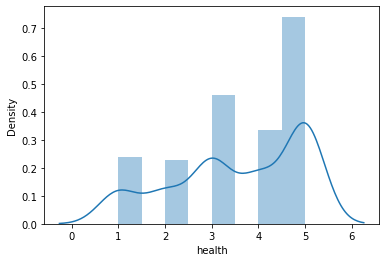

absences
3.6576215119890154


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


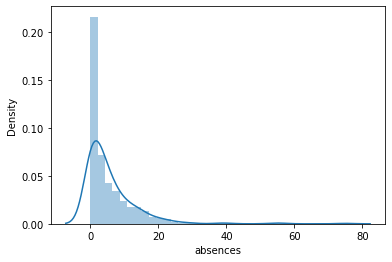

G1
0.23969855664115217


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


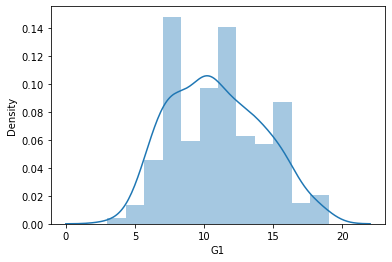

G2
-0.4300044971456705


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


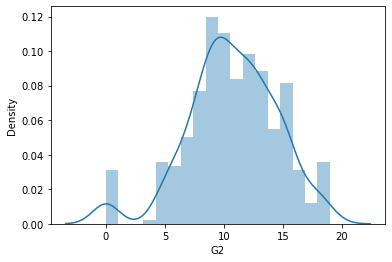

G3
-0.7298871128420806


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


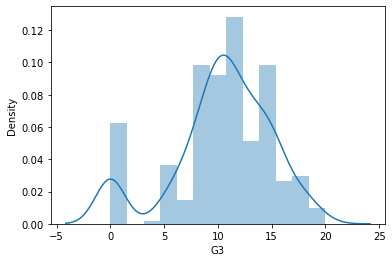

In [26]:
from scipy.stats import skew

for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [27]:
#check the skew
df.skew()

school        2.400519
sex           0.106886
age           0.466270
address       1.337481
famsize      -0.936623
Pstatus      -2.607984
Medu         -0.318381
Fedu         -0.031672
Mjob         -0.335188
Fjob          1.117396
reason       -0.026204
guardian      1.385182
traveltime    1.607029
studytime     0.632142
failures      2.387026
schoolsup     2.220534
famsup       -0.464291
paid          0.168315
activities   -0.035584
nursery       1.466570
higher        4.114829
internet      1.791595
romantic      0.705766
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          2.190762
Walc          0.611960
health       -0.494604
absences      3.671579
G1            0.240613
G2           -0.431645
G3           -0.732672
dtype: float64

<AxesSubplot:>

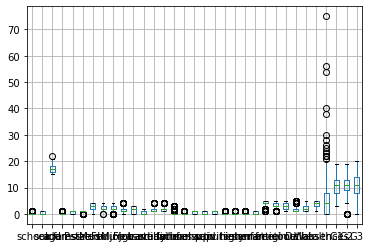

In [28]:

df.boxplot()

In [29]:
df['romantic'].value_counts()

0    263
1    132
Name: romantic, dtype: int64

In [30]:
df['internet'].unique()

array([1, 0], dtype=int64)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [33]:
#  add g1,g2,g3 and divide by 3 then stored in exam 
df['exam']=(df['G1']+df['G2']+df['G3'])/3

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    int64  
 1   sex         395 non-null    int64  
 2   age         395 non-null    int64  
 3   address     395 non-null    int64  
 4   famsize     395 non-null    int64  
 5   Pstatus     395 non-null    int64  
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    int64  
 9   Fjob        395 non-null    int64  
 10  reason      395 non-null    int64  
 11  guardian    395 non-null    int64  
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    int64  
 16  famsup      395 non-null    int64  
 17  paid        395 non-null    int64  
 18  activities  395 non-null    int64  
 19  nursery     395 non-null    i

In [35]:
df['exam'].head()

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
Name: exam, dtype: float64

In [36]:
df['verdict']=np.where(df['exam']>=10,1,0)

In [37]:
df['verdict'].value_counts()

1    231
0    164
Name: verdict, dtype: int64

In [38]:
df['verdict'].head()

0    0
1    0
2    0
3    1
4    0
Name: verdict, dtype: int32

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    int64  
 1   sex         395 non-null    int64  
 2   age         395 non-null    int64  
 3   address     395 non-null    int64  
 4   famsize     395 non-null    int64  
 5   Pstatus     395 non-null    int64  
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    int64  
 9   Fjob        395 non-null    int64  
 10  reason      395 non-null    int64  
 11  guardian    395 non-null    int64  
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    int64  
 16  famsup      395 non-null    int64  
 17  paid        395 non-null    int64  
 18  activities  395 non-null    int64  
 19  nursery     395 non-null    i

In [40]:


df.verdict.unique()

array([0, 1])

In [41]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,exam,verdict
0,0,0,18,0,1,0,4,4,0,0,...,4,1,1,3,6,5,6,6,5.666667,0
1,0,0,17,0,1,1,1,1,0,1,...,3,1,1,3,4,5,5,6,5.333333,0
2,0,0,15,0,0,1,1,1,0,1,...,2,2,3,3,10,7,8,10,8.333333,0
3,0,0,15,0,1,1,4,2,1,2,...,2,1,1,5,2,15,14,15,14.666667,1
4,0,0,16,0,1,1,3,3,2,1,...,2,1,2,5,4,6,10,10,8.666667,0


In [42]:
df['nursery'].value_counts()    

0    314
1     81
Name: nursery, dtype: int64

In [43]:
## spliting the data into feature & target
X = df.drop(columns='verdict',axis=1)
Y = df['verdict']

In [44]:
print(X)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        0        1        0     4     4     0     0  ...   
1         0    0   17        0        1        1     1     1     0     1  ...   
2         0    0   15        0        0        1     1     1     0     1  ...   
3         0    0   15        0        1        1     4     2     1     2  ...   
4         0    0   16        0        1        1     3     3     2     1  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
390       1    1   20        0        0        0     2     2     3     2  ...   
391       1    1   17        0        0        1     3     1     3     2  ...   
392       1    1   21        1        1        1     1     1     2     1  ...   
393       1    1   18        1        0        1     3     2     3     1  ...   
394       1    1   19        0        0        1     1     1     2     4  ...   

     freetime  goout  Dalc 

In [45]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    1
392    0
393    1
394    0
Name: verdict, Length: 395, dtype: int32


In [48]:
## split the data into training data & testing data
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(395, 34) (316, 34) (79, 34)


## Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [51]:
# training the logistic regression model with training data
model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# Accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data :',training_data_accuracy)

Accuracy on training data : 1.0


In [53]:
# Accuracy on Test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on Test data :',test_data_accuracy)

Accuracy on Test data : 0.9746835443037974


In [67]:
print(classification_report(X_test_prediction , Y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.96      1.00      0.98        44

    accuracy                           0.97        79
   macro avg       0.98      0.97      0.97        79
weighted avg       0.98      0.97      0.97        79



## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [70]:
# Training data accuracy

train_prediction = decision.predict(X_train)
training_accuracy = accuracy_score(train_prediction,Y_train)
print('Accuracy on DecisionTree training data : ',training_accuracy)

Accuracy on DecisionTree training data :  1.0


In [71]:
# Testing data accuracy
 
test_prediction = decision.predict(X_test)
test_accuracy = accuracy_score(test_prediction,Y_test)
print('Accuracy on DecisionTree test data : ',test_accuracy)

Accuracy on DecisionTree test data :  1.0


In [72]:
print(classification_report(test_prediction1 , Y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.89      0.95      0.92        43

    accuracy                           0.91        79
   macro avg       0.92      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



## KNeighbors Alg

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [58]:
# Training data accuracy

train_prediction = knn.predict(X_train)
training_accuracy = accuracy_score(train_prediction,Y_train)

print('Accuracy on KNN training data : ',training_accuracy)

Accuracy on KNN training data :  0.9715189873417721


In [62]:
# Testing data accuracy

test_prediction1 = knn.predict(X_test)
test_accuracy = accuracy_score(test_prediction1,Y_test)

print('Accuracy on KNN test data : ',test_accuracy) 

Accuracy on KNN test data :  0.9113924050632911


In [63]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(test_prediction1 , Y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.89      0.95      0.92        43

    accuracy                           0.91        79
   macro avg       0.92      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79

